In [34]:
from linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("Student_Performance.csv")

In [36]:
data.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [38]:
data = pd.get_dummies(data,columns=["Extracurricular Activities"])
data["Extracurricular Activities_No"] = data["Extracurricular Activities_No"].astype("int32")
data["Extracurricular Activities_Yes"] = data["Extracurricular Activities_Yes"].astype("int32")

In [39]:
data.head()

Hours Studied  Previous Scores  Sleep Hours  \
0              7               99            9   
1              4               82            4   
2              8               51            7   
3              5               52            5   
4              7               75            8   

   Sample Question Papers Practiced  Performance Index  \
0                                 1               91.0   
1                                 2               65.0   
2                                 2               45.0   
3                                 2               36.0   
4                                 5               66.0   

   Extracurricular Activities_No  Extracurricular Activities_Yes  
0                              0                               1  
1                              1                               0  
2                              0                               1  
3                              0                               1  
4                              1                               0

In [40]:
correlation_matrix = data.corr()

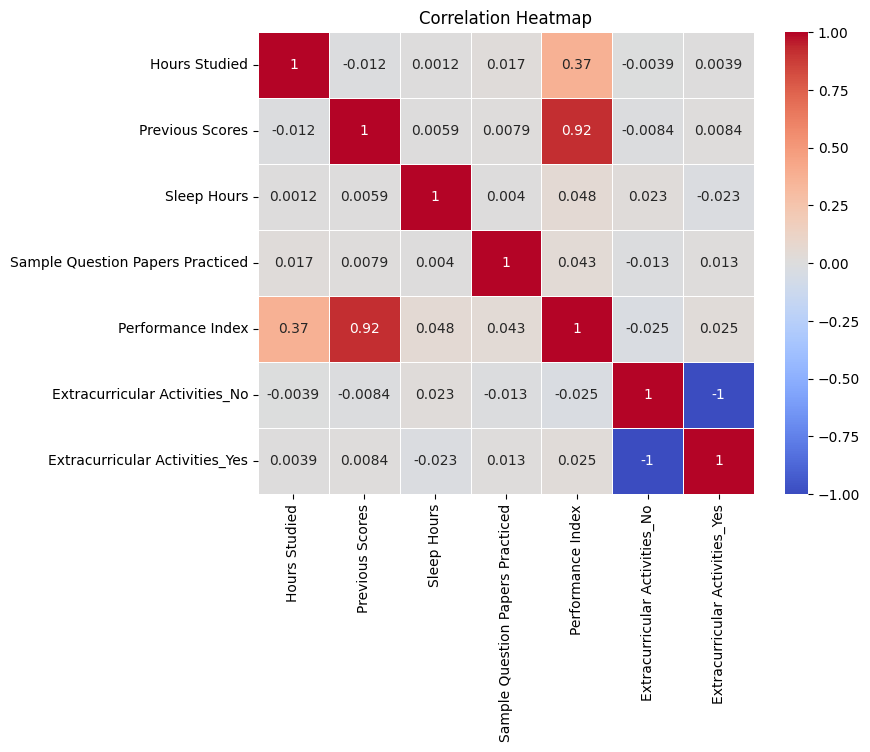

In [41]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

> we will take  previous scores  and  hours studied  as features for our linear regression model 


Text(0, 0.5, 'Performance index')

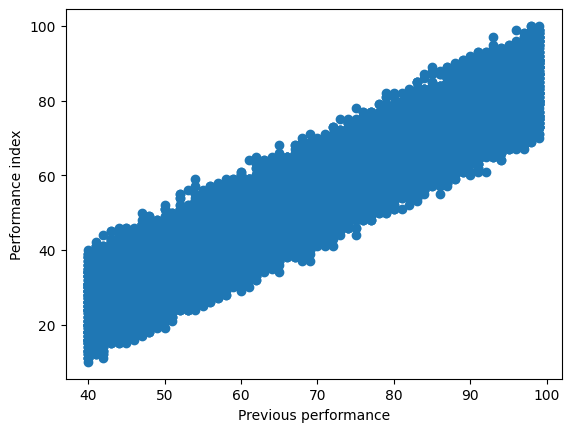

In [42]:
plt.scatter(data["Previous Scores"],data["Performance Index"])
plt.xlabel("Previous performance")
plt.ylabel("Performance index")

Text(0, 0.5, 'Performance index')

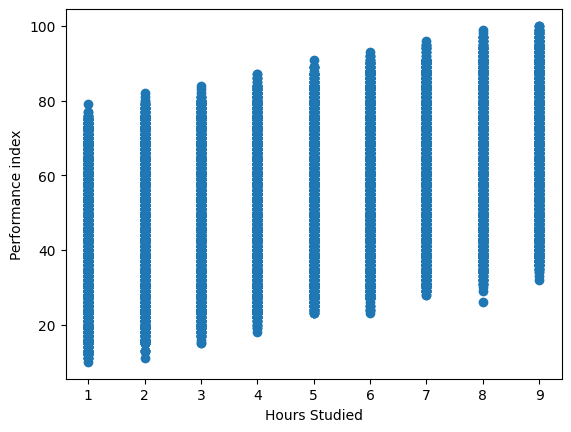

In [43]:
plt.scatter(data["Hours Studied"],data["Performance Index"])
plt.xlabel("Hours Studied")
plt.ylabel("Performance index")

In [44]:
#split data into 80% training 20% testing
train_x = data[["Previous Scores","Hours Studied"]].head(8000).to_numpy()
train_y = data["Performance Index"].head(8000).to_numpy()
train_y = np.reshape(train_y,(1,8000))

test_x = data[["Previous Scores","Hours Studied"]].head(2000).to_numpy()
test_y = data["Performance Index"].head(2000).to_numpy()
test_y = np.reshape(test_y,(1,2000))

In [51]:
lr = LinearRegression(2)

In [52]:
lr.fit(1000000,0.0001,train_x.T,train_y)

epoch 0 | loss = 31442.255359132483
epoch 10 | loss = 54.864010001116405
epoch 20 | loss = 54.63391477578318
epoch 30 | loss = 54.410975833782096
epoch 40 | loss = 54.19496248866475
epoch 50 | loss = 53.98565149188841
epoch 60 | loss = 53.78282679299911
epoch 70 | loss = 53.58627930754685
epoch 80 | loss = 53.395806692484285
epoch 90 | loss = 53.21121312880641
epoch 100 | loss = 53.032309111199325
epoch 110 | loss = 52.85891124447072
epoch 120 | loss = 52.690842046544056
epoch 130 | loss = 52.52792975780458
epoch 140 | loss = 52.370008156592945
epoch 150 | loss = 52.21691638064748
epoch 160 | loss = 52.06849875430336
epoch 170 | loss = 51.92460462126396
epoch 180 | loss = 51.78508818276346
epoch 190 | loss = 51.64980834094783
epoch 200 | loss = 51.51862854730557
epoch 210 | loss = 51.391416655985346
epoch 220 | loss = 51.268044781843024
epoch 230 | loss = 51.148389163065936
epoch 240 | loss = 51.03233002822593
epoch 250 | loss = 50.91975146761924
epoch 260 | loss = 50.81054130875515
ep

In [53]:
lr.mse(lr.forward_pass(train_x.T),train_y)

5.1725354999582445

In [55]:
lr.r2(test_x.T,test_y)

0.9861019986858035

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data[["Previous Scores","Hours Studied"]], data["Performance Index"], test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 5.241921186551513
R^2 Score: 0.985855014245765
